# PA 3-3: Association Analysis - Apriori/FP Growth

## Student Details 

Student Name and ID: Group members name and ID :-

Krishna Kumar Balasubramanian 1001949939
Pooja Srinivasan 1001952061
Mohanraj Senabady 1001964323 



## Submission Instructions

Rename this submission file as specified in the instructions document

## Tasks

1.    Load the dataset (from the csv file)

In [1]:
import pandas as pd #pandas is a Python library used for working with data sets
import numpy as np #perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt #used for visualizations in Python
import seaborn as sns #seaborn is built on matplotlib
import ast #helps Python applications to process trees of the Python abstract syntax grammar
import time #returns the number of seconds passed since epoch
import csv

In [2]:
from matplotlib.pyplot import scatter #visual representation of how two variables relate to each other
from tqdm import tqdm #used to create a smart progress bar for the loops.
from mlxtend.preprocessing import TransactionEncoder #encodes database transaction data in form of a Python list of lists into a NumPy array.
from mlxtend.frequent_patterns import apriori #extracting frequent itemsets with applications in association rule learning.
from mlxtend.frequent_patterns import fpgrowth #the mining of pattern itemsets, subsequences, and substructures that appear frequently in a dataset
from mlxtend.frequent_patterns import association_rules #"if-then" statements, that help to show the probability of relationships between data items, within large data sets in various types of databases

In [3]:
data = pd.read_csv("dataset3.csv")
data = data.iloc[:, 1:]
data.head(5)

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


2.Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [4]:
print("Null values:", data.isnull().sum())


Null values: Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64


#### Converting items in the column as strings

In [5]:
data = data.astype(str)

#### Removing unnecessary commas and whitespace from the items column

#### Spliting the items column into a items list

#### Converting items column to a list of lists

In [6]:
trans = data.values.tolist()
preprocessed_dataset = pd.DataFrame(trans)
preprocessed_list = preprocessed_dataset.values.tolist()
print(preprocessed_list)

[['False', 'True', 'False', 'False', 'True', 'True', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'True', 'True'], ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'False'], ['True', 'False', 'True', 'False', 'False', 'True', 'False', 'True', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'True'], ['False', 'False', 'True', 'True', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'False', 'False', 'False', 'False'], ['True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False'], ['True', 'True', 'True', 'True', 'False', 'True', 'False', 'True', 'False', 'False', 'True', 'False', 'False', 'True', 'True', 'True'], ['False', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'True', 'True', 'True', 'False', 'False', 'True', 'False'], ['True', 'False', 

#### Convert each item string in the items column to a list of items

In [7]:
data = data.apply(lambda x: eval(x) if isinstance(x, str) else x)
data.head(5)

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


3.    Encode the dataset

#### Using transaction encoder fitting and transforming the data

In [8]:
traen = TransactionEncoder()
traen_array = traen.fit(preprocessed_list).transform(preprocessed_list)
traen_array

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [9]:
#3 different combinations of support and confidence
sl = [0.04, 0.05, 0.06]
cl = [0.2, 0.3, 0.4]

#checking whether the transctions are not empty
if not trans:
    raise ValueError("Input transactions are empty.")

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        #apriori algorithm
        data1 = pd.DataFrame(traen_array, columns=traen.columns_)
        freq_item = apriori(data1, min_support=support, use_colnames=True)
        print('freq_item',freq_item)

        asso_rule = association_rules(freq_item, metric="confidence", min_threshold=confidence) #generating association rules

        if asso_rule.empty:
            print(f"No association rules found for Support={support} and Confidence={confidence}")  #checking whether the transctions are not empty
            continue
        
        #by applying frozenset to each item in the 'antecedents' column, we are essentially converting each set of antecedents into an immutable frozenset.
        asso_rule['antecedents'] = asso_rule['antecedents'].apply(frozenset)
        #asso_rule['consequents'] = asso_rule['consequents'].apply(frozenset)

        #maximal and closed sets
        maxed_set = freq_item[~freq_item['itemsets'].apply(lambda x: any(frozenset(x).issubset(s) and frozenset(x) != s for s in freq_item['itemsets']))]['itemsets'].apply(frozenset).tolist()
        closed_set = freq_item[~freq_item['support'].duplicated(keep='last')]['itemsets'].apply(frozenset).tolist()
                
        print(f"Support = {support:.2f}","/", f"Confidence = {confidence:.2f}","/", f"Total No.association rules: {len(asso_rule)}","/", f"No. of Maximal Sets: {len(maxed_set)}","/", f"No. of Closed Sets: {len(closed_set)}\n")
        print("Top 10 rules ordered by confidence descending:")
        print(asso_rule.nlargest(10, 'confidence').to_string(index=False))
        print("\n")

freq_item    support       itemsets
0      1.0        (False)
1      1.0         (True)
2      1.0  (False, True)
Support = 0.04 / Confidence = 0.20 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1

Top 10 rules ordered by confidence descending:
antecedents consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction  zhangs_metric
    (False)      (True)                 1.0                 1.0      1.0         1.0   1.0       0.0         inf            0.0
     (True)     (False)                 1.0                 1.0      1.0         1.0   1.0       0.0         inf            0.0


freq_item    support       itemsets
0      1.0        (False)
1      1.0         (True)
2      1.0  (False, True)
Support = 0.04 / Confidence = 0.30 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1

Top 10 rules ordered by confidence descending:
antecedents consequents  antecedent support  consequent su

5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [10]:
#3 different combinations of support and confidence
sl = [0.04, 0.05, 0.06]
cl = [0.2, 0.3, 0.4]

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        freq_item = fpgrowth(data1, min_support=support, use_colnames=True) #fp Growth algorithm
        asso_rule = association_rules(freq_item, metric="confidence", min_threshold=confidence) #generating association rules using the frequent itemsets

        #checking whether association rules are not empty
        if asso_rule.empty:
            print(f"No association rules found for Support={support} and Confidence={confidence}")
            continue

        #by applying frozenset to each item in the 'antecedents' column, we are essentially converting each set of antecedents into an immutable frozenset.s
        asso_rule['antecedents'] = asso_rule['antecedents'].apply(frozenset)
        asso_rule['consequents'] = asso_rule['consequents'].apply(frozenset)
                
        print(f"Support = {support:.2f}","/", f"Confidence = {confidence:.2f}","/", f"Total No.association rules: {len(asso_rule)}","/", f"No. of Maximal Sets: {len(maxed_set)}","/", f"No. of Closed Sets: {len(closed_set)}\n")
        # print("Top 10 rules ordered by confidence descending:")
        # print(asso_rule.nlargest(10, 'confidence').to_string(index=False))
        print("\n")

Support = 0.04 / Confidence = 0.20 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.04 / Confidence = 0.30 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.04 / Confidence = 0.40 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.05 / Confidence = 0.20 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.05 / Confidence = 0.30 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.05 / Confidence = 0.40 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.06 / Confidence = 0.20 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.06 / Confidence = 0.30 / Total No.association rules: 2 / No. of Maximal Sets: 1 / No. of Closed Sets: 1



Support = 0.06 / Confidence = 0.40 / Total No.as

In [11]:
df_fp = pd.read_csv('dataset3.csv', index_col=0)
df_fp.head(5)

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df_fp.to_csv('dataset#3.csv', index=False,header=False)
df_fp

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [13]:
dataset_three = open('dataset#3.csv')
line = csv.reader(dataset_three)

#Reading dataset line by line
dataset_lst = []
for i in line:
    dataset_lst.append(i)

#separating the values and appending them individually in one_lst
one_lst = []
for j in dataset_lst:
    one_lst.append(j[0].split(','))  

te = TransactionEncoder()
te_ary = te.fit(one_lst).transform(one_lst)
data_three = pd.DataFrame(te_ary, columns=te.columns_)

In [14]:
fpgrowth(data_three, min_support=0.04, use_colnames=True)

,support,itemsets
0,0.616617,(False)
1,0.383383,(True)


In [15]:
fpgrowth(data_three, min_support=0.05, use_colnames=True)

,support,itemsets
0,0.616617,(False)
1,0.383383,(True)


In [16]:
fpgrowth(data_three, min_support=0.06, use_colnames=True)

,support,itemsets
0,0.616617,(False)
1,0.383383,(True)


6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

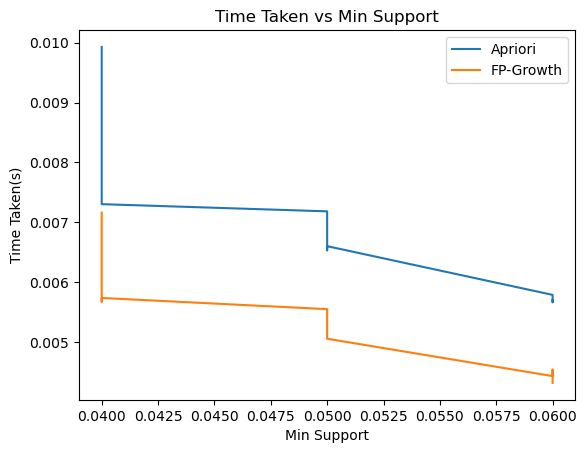

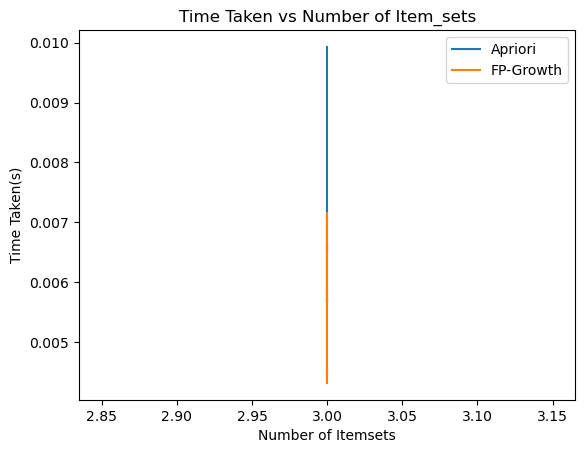

In [17]:
#3 different combinations of support and confidence
sl = [0.04, 0.05, 0.06]
cl = [0.2, 0.3, 0.4]

#checking whether the transctions are not empty
if not trans:
    raise ValueError("Input transactions are empty.")

#the lists below are is initialized as empty
ap_time = []
fp_time = []
min_support = []
itemsets_ap = []
itemsets_fp = []

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        #apriori algorithm
        start_time = time.time()
        traen = TransactionEncoder()
        traen_array = traen.fit(trans).transform(trans)
        data1 = pd.DataFrame(traen_array, columns=traen.columns_)
        freq_item = apriori(data1, min_support=support, use_colnames=True)
        end_time = time.time()

        #time taken and number of itemsets generated
        ap_time.append(end_time - start_time) #timedelta object representing the time difference between the two timestamps
        itemsets_ap.append(len(freq_item))
        min_support.append(support)

        #fp Growth algorithm
        start_time = time.time()
        freq_item = fpgrowth(data1, min_support=support, use_colnames=True)
        end_time = time.time()

        #time taken and number of itemsets generated
        fp_time.append(end_time - start_time)
        itemsets_fp.append(len(freq_item))


#graph 1: time vs min support
fig, ax = plt.subplots()
ax.plot(min_support, ap_time, label='Apriori')
ax.plot(min_support, fp_time, label='FP-Growth')
ax.set_xlabel('Min Support')
ax.set_ylabel('Time Taken(s)')
ax.set_title('Time Taken vs Min Support')
ax.legend()
plt.show()

#graph 2: time vs number of itemsets
fig, ax = plt.subplots()
ax.plot(itemsets_ap, ap_time, label='Apriori')
ax.plot(itemsets_fp, fp_time, label='FP-Growth')
ax.set_xlabel('Number of Itemsets')
ax.set_ylabel('Time Taken(s)')
ax.set_title('Time Taken vs Number of Item_sets')
ax.legend()
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

The first graph demonstrates that the execution time for both Apriori and FP-growth algorithms decreases as the minimum support value increases. However, the results indicate that FP-growth consistently performs better than Apriori for most of the tested minimum support values, as its execution time is consistently lower. On the other hand, Apriori exhibits higher execution times for most of its tested values. These findings suggest that FP-growth is a more efficient algorithm than Apriori in terms of execution time.

The graphs show that FP-growth algorithm outperforms Apriori in terms of execution time and number of itemsets generated for the same maximum itemset size value. Apriori scans the database in each of its steps, which makes it time-consuming for larger datasets. This is not the case with FP-growth, which utilizes a tree structure to efficiently mine frequent itemsets, resulting in faster execution times and smaller number of itemsets generated. Therefore, based on these results, it can be concluded that FP-growth is generally a more efficient algorithm than Apriori.

# Rubric
* [02 points] - Student Details and complying with submission instructions 
* [03 points] - Task 1 
* [10 points] - Task 2
* [05 points] - Task 3
* [25 points] - Task 4
* [25 points] - Task 5
* [20 points] - task 6
* [10 points] - task 7

In [ ]:
#Reference
#https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis
#https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342